In [2]:
# Accessing the target labels
targets = breast_cancer_wisconsin_diagnostic['data']
target_labels = targets['targets']['Diagnosis']

# Accessing the features
features = targets['features']  # Assuming all columns except 'Diagnosis' are features

# Extract features for malignant tumors ('M')
malignant_tumors = features[target_labels == 'M']

# Extract features for benign tumors ('B')
benign_tumors = features[target_labels == 'B']

# Printing the features of malignant and benign tumors
print("Malignant Tumors:")
print(malignant_tumors)

print("\nBenign Tumors:")
print(benign_tumors)


Malignant Tumors:
     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
563    20.92     25.09      143.00  1347.0      0.10990       0.22360   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010         

In [21]:
from ucimlrepo import fetch_ucirepo 

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

print(breast_cancer_wisconsin_diagnostic.data.features)
print(breast_cancer_wisconsin_diagnostic.data.targets.values)

     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.14710     0.241

In [27]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets.values 

# Reshape the target variable y
y = np.ravel(y)

# Change class values into 1s and 0s for binary classification
# Convert M = 1, B = 0
y_encoded = np.where(y == 'M', 1, 0)

# metadata 
# print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
# print(breast_cancer_wisconsin_diagnostic.variables) 

# Split the dataset into training and testing sets
# 80% of data for training
# 20% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize Support Vector Classifier
svm = SVC(probability=True)

# Fit the model on the training data
svm.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = svm.predict_proba(X_test)

# Predict class labels for the test set
y_pred = svm.predict(X_test)

# Compare predicted labels with ground truth
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
decision_scores = svm.decision_function(X_test)
auc = roc_auc_score(y_test, decision_scores)

print(f"Accuracy of diagnosis prediction: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC Score: {auc:.2f}")

Accuracy of diagnosis prediction: 94.74%
Precision: 1.00
Recall: 0.86
F1 Score: 0.92
AUC Score: 0.99


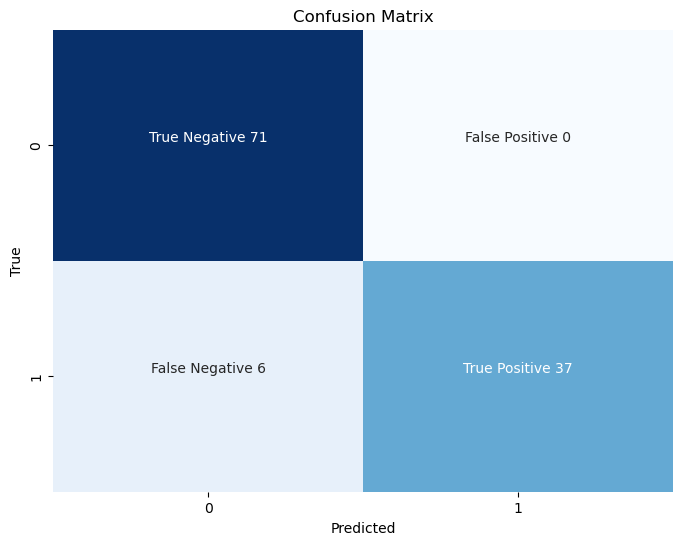

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Labels for the matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [f' {value}\n' for value in conf_matrix.flatten()]

labels = np.asarray([f'{label}{count}' for label, count in zip(labels, counts)]).reshape(2, 2)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()